# **Compressed Sensing 2021 Project : Dictionary Learning**
Hugo Chardon & Théo Jolivet

## 1 General framework of Dictionary Learning

### 1.1 One dictionary to learn them all

In the classical setting of dictionary learning, we consider a signal $\mathbf{x}\in \mathbb{R}^N$ and we want to represent it in a basis in which it has a sparse representation. The key idea is to write $\mathbf{x}$ as a linear combination of $k$ other vectors lying in $\mathbb{R}^N$, called _atoms_ of a predefined _dictionary_. Such a dictionary will be denoted by a matrix $\mathbf{D}=[\mathbf{d}_1, \dots, \mathbf{d}_k ] \in \mathbb{R}^{N\times k}$, and we want to find the coefficients $\alpha_1, \dots, \alpha_k$ such that $\sum_{i=1}^k \alpha_i \mathbf{d}_i$ is relatively close to $\mathbf{x}$ in $\ell_2$-norm. More precisely, we aim at minimizing : 

$$
\underset{\boldsymbol{\alpha} \in \mathbb{R}^k}{\min} \ \dfrac{1}{2} \lVert \mathbf{x} - \mathbf{D} \boldsymbol{\alpha} \rVert_2^2
$$

In order to enforce a sparse representation of $\mathbf{x}$ in such a dictionary, we penalize the $\ell_1$-norm of the $\boldsymbol{\alpha}$'s as in the LASSO estimator. We denote $l(\mathbf{x},\mathbf{D})$ the optimal value of the $\ell_1$-_sparse coding_ problem :

$$
l(\mathbf{x},\mathbf{D}) = \underset{\boldsymbol{\alpha} \in \mathbb{R}^k}{\min} \ \dfrac{1}{2} \lVert \mathbf{x}-\mathbf{D}\boldsymbol{\alpha}\lVert_2^2 \ + \ \lambda\lVert\boldsymbol{\alpha}\lVert_1
$$

To compute the dictionary, we usually have access to $n$ observations following a distribution $p(\mathbf{x})$, stored in $\mathbf{X} = [\mathbf{x}_1, \dots ,\mathbf{x}_n] \in \mathbb{R}^{N \times n} $, and we then minimize the _empirical risk_ $f_n(\mathbf{D}) = \dfrac{1}{n} \sum_{i=1}^n l(\mathbf{x}_i,\mathbf{D})$. Recall that we aim at minimizing the _expected  risk_ $f(\mathbf{D}) = \mathbb{E}_{\mathbf{x}}[l(\mathbf{x},\mathbf{D})]$ which is linked to $f_n$ by $f(\mathbf{D}) = \underset{n \to + \infty}{\lim} f_n(\mathbf{D})$.

Famous examples of such dictionaries that are widely used in signal processing are the wavelets or Fourier basis, in which we can find a sparse representation of $\mathbf{x}$.

### 1.2 Adaptive Dictionary

Notable applications in signal processing (denoising, inpainting, etc...) and unsupervised data modeling (recommender systems, document clustering, etc...) called for more scalable and efficient matrix-factorization methods. Adaptive dictionaries were thus introduced in recent years to learn the dictionary instead of using a predefined one, and the optimization now seeks to find the coefficients $\boldsymbol{\alpha}$ as well as the dictionary $\mathbf{D}$.

To avoid having arbitrarily large values for the columns of the dictionary (and thus an arbitrarily small $\boldsymbol{\alpha}$), we only consider dictionaries which columns have a $\ell_2$-norm of one at most, that is, dictionaries in the set $\mathcal{C} = \{ \mathbf{D} \in \mathbb{R}^{N \times k} \ \text{s.t.} \ \forall j = 1,...,k; \ \mathbf{d}_j^T \mathbf{d}_j \leq 1 \}$. We can then rewrite the problem as a joint optimization problem : 

$$
\underset{\mathbf{D} \in \mathcal{C}, \ \alpha \in \mathbb{R}^{k \times n}}{\min} \ \dfrac{1}{n} \sum_{i=1}^n (\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1)
$$

which is convex with respect to both variables when the other is fixed. We optimize the objective function with respect to both the dictionary $\mathbf{D} \in \mathbb{R}^{N \times k}$ and the coefficients $\boldsymbol{\alpha} = [\boldsymbol{\alpha}_1,...,\boldsymbol{\alpha}_n] \in \mathbb{R}^{k \times n}$. Usually, $k$ is a multiple of 2, such as 256, 512 or 1024. Dictionaries with $k>N$ are called _overcomplete_ dictionaries.

## 2 Simultaneous dictionary learning and classification (based on _Supervised Dictionary Learning_,  NeurIPS '08)

We introduce here the core idea presented in the article. Rather than first creating a sparse representation of the data through dictionary representation and then performing a classical task such as classification on the projected data, the authors propose to perform both tasks simultaneously. Without loss of generality, we will focus on binary classification (generalization is not difficult but the core ideas would remain the same with added technicalities).

### 2.1 Standard classification task

We have $n$ data points $\mathbf{x}_1, ..., \mathbf{x}_n$ endowed with labels $y_i = \pm 1$. We want to learn a function $f(\mathbf{x}, \boldsymbol{\alpha}, \boldsymbol{\theta})$ (namely, the parameter $\boldsymbol{\theta}$) generally referred to as a soft classifier, such that $\forall i$, $\mathrm{sgn}(f(\mathbf{x}_i)) = y_i$. The parameter $\boldsymbol{\theta}$ can be learned as the result of the following optimization procedure :

$$
\underset{\boldsymbol{\theta}}{\min} \ \sum_{i=1}^n c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_2 \lVert \boldsymbol{\theta} \rVert_2^2
$$

with $c(u)= \log(1+e^{-u})$ the logistic loss (convex surrogate of the 0-1 loss).

### 2.2 Simultaneous learning

We create a mixed objective function that contains both a classification loss component and a dictionary learning one.

$$
\underset{\mathbf{D}, \boldsymbol{\theta}, \boldsymbol{\alpha}}{\min} \ \sum_{i=1}^n \left(c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_0 \lVert \mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \rVert_2^2 + \lambda_1 \lVert \boldsymbol{\alpha}_i \rVert_1\right) + \lambda_2 \lVert \boldsymbol{\theta} \rVert_2^2 \qquad (*)
$$

which can be rewritten as 

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)
$$

with 

$$
\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i) = \underset{\boldsymbol{\alpha}_i}{\min} \ \mathcal{S}(\boldsymbol{\alpha}_i, \mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)
$$

where 

$$
\mathcal{S}(\boldsymbol{\alpha}_i, \mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i) = c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_0 \lVert \mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \rVert_2^2 + \lambda_1 \lVert \boldsymbol{\alpha}_i \rVert_1
$$

Note that $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)$ is the loss for a single pair of observations $(\mathbf{x}_i, y_i)$.

#### 2.2.1 A more discriminative approach


In order to make the overall model more disriminative between the two classes we want to construct our dictionary such that the loss for a wrong prediction $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i)$ is bigger than the loss for a correct prediction $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)$. The key point here being that the loss itself depends on the dictionary $\mathbf{D}$ and the codes $\boldsymbol{\alpha}_i$'s. We formulate this new idea in the following optimization problem : 

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n c\left(\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i) - \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right) + \lambda_2 \lVert \boldsymbol{\theta} \rVert^2
$$

#### 2.2.2 The trade-off

This last problem is harder to solve than $(*)$ so we compromise between the two and introduce a trade-off parameter $\mu$ to solve a composite optimization problem :

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n \left[ \mu \, c\left(\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i) - \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right) + (1-\mu) \, \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right] + \lambda_2 \lVert \boldsymbol{\theta} \rVert^2 \qquad (**)
$$

#### 2.2.3 From learnt dictionary to classification

Once we have learnt both the dictionary and the classifier's parameters, we use them to predict the labels of new (or test) examples. given a new example $\mathbf{x}$, its label is predicted by comparing $\mathcal{S}^*(\mathbf{x}, \mathbf{D}, \boldsymbol{\theta}, -1)$ and $\mathcal{S}^*(\mathbf{x}, \mathbf{D}, \boldsymbol{\theta}, 1)$. The attributed label is the one for which $\mathcal{S}^*$ is the lowest. Therefore, we note that a new prediction requires to compute the dictionary representation of the new example : what we refer to as _supervised sparse coding_. 

### 2.3 Implementation

Solving the optimization problem $(**)$ is carried out by alternate block coordinate descent. We alternate between :

(i) _Supervised sparse coding_ : this step aims at computing the representations $\boldsymbol{\alpha}_i$'s of the datapoints $\mathbf{x}_i$ in the dictionary $\mathbf{D}$ with the classifier's parameter $\boldsymbol{\theta}$ fixed. This step amounts to computing the above-defined $\mathcal{S^*}$ and the $\boldsymbol{\alpha}$ that minimizes it, for both $y_i$ and $-y_i$.

(ii) _Supervised dictionary update_ : this time, the $\boldsymbol{\alpha}_i$'s are fixed and we want to update the dictionary $\mathbf{D}$ and the classifier's parameter $\boldsymbol{\theta}$.


Regarding the step $(i)$ in the algorithm described above, the authors suggest using a method known as _fixed-point continuation method_ which is a very general framework for this class of optimization problems. We propose here to compare two approaches : one using the python library cvxpy (in which the optimization method used is not specified) and a _manual_ method (that is, an optimization algorithm written from scratch and inspired by the LASSO implementation of coordinate subgradient descent).

Hereafter we describe and implement the algorithm _Supervised Dictionary Learning_ proposed by the authors. 

In [13]:
!pip install cvxpy==1.1.11
!pip install matplotlib
!pip install tqdm
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 MB 2.8 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.8 MB/s eta 0:00:0000:0100:01
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.7/961.7 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 2.4 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.3 MB/s eta 0:00:0000:0100:01
  Using cached google_pasta-0.2.0-py3-none-an

In [1]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
# import cvxpy as cp
from numpy import random as rd
from keras.datasets import mnist
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction import image
from tqdm import trange
from sklearn.linear_model import Lasso

In the cell below we define some elementary functions and an optimization procedure used to compute the step $(i)$ (Supervised sparse coding) :

In [5]:
# Supervised sparse coding
# w and b are the linear classifier parameters, they are fixed for this step

def loss(x, D, w, b, alpha, y, lambda0=1e-3):
    return cp.logistic(y * (cp.sum(cp.multiply(w, alpha)) + b)) + lambda0 * cp.norm2(x - D @ alpha) **2


def objective(x, D, w, b, alpha, y, lambda0=1e-3, lambda1=1e-3):
    return loss(x, D, w, b, alpha, y, lambda0) + lambda1 * cp.norm1(alpha)


# Computing the vector alpha
# This function will be used in the main algorithm for the alphas update step
def supervised_sparse_coding(x, D, w, b, y, reconstruction_param, regularization_param, require_opt_value=False):
    """ Supervised sparse coding.

        :param x: the observation of which we want the dictionary representation
        :param D: dictionary
        :param w: weights of the function f
        :param b: bias of the function f
        :param y: labels of the observations
        :param reconstruction_param: reconstruction error parameter
        :param regularization_param: l1 regularization parameter

        :return: coefficients alpha (if require_opt_value is False) or minimal value of the objective (if require_opt_value is True)
    """

    k = D.shape[1] # Number of atoms in the dictionary = number of columns in D
    alpha = cp.Variable(k)
    lambda0 = cp.Parameter(nonneg=True)
    lambda1 = cp.Parameter(nonneg=True)

    problem = cp.Problem(cp.Minimize(objective(x, D, w, b, alpha, y, lambda0, lambda1)))

    lambda0.value = reconstruction_param
    lambda1.value = regularization_param

    problem.solve(solver=cp.SCS, max_iters=5000)
    #problem.solve(solver='CVXOPT')

    # In some cases we need the optimal value S^*, in some other cases we need the optimal alpha (i.e. argmin)

    if require_opt_value:
        return problem.value
    else:
        return alpha.value


def make_prediction(x, D, w, b, reconstruction_param, regularization_param):
    pos_loss = supervised_sparse_coding(x, D, w, b, 1, reconstruction_param, regularization_param, require_opt_value=True)
    neg_loss = supervised_sparse_coding(x, D, w, b, -1, reconstruction_param, regularization_param, require_opt_value=True)

    predicted_label = 1 if pos_loss < neg_loss else -1 # Pseudo-classifier as a plug-in
    
    return predicted_label

In [6]:
# Test of alphas update

N = 1000
k = 100

test_vector = rd.randn(N)
dictionary = rd.randn(N, k)

w = rd.randn(k)
b = rd.randn()

lambda0_test = 0.5
lambda1_test = 0.15 * lambda0_test

alpha_opt = supervised_sparse_coding(x=test_vector, D=dictionary, w=w, b=b, y=1, reconstruction_param=lambda0_test, regularization_param=lambda1_test)
print(alpha_opt)

random_alpha = rd.randn(k)

print('quelconque : ', np.sum((test_vector - dictionary @ random_alpha)**2))
print('optimal : ', np.sum((test_vector - dictionary @ alpha_opt)**2))

NameError: name 'cp' is not defined

This is a toy example for the computation of $\boldsymbol{\alpha}$'s. We want to know if we learn the right coefficients for a random dictionary, and we compare them with random coefficients. The reconstruction error is lower with the optimized coefficients, showing that the learnt coefficients (alpha_opt) perform better at the reconstruction task. 

Then we define the functions needed to compute step $(ii)$ (Supervised dictionary update). We will perform the update of $\mathbf{D}$ and $\boldsymbol{\theta}$ by solving the above stated minimization problem. 

In [5]:
# Supervised dictionary update

def logistic(u):
    return np.log(1 + np.exp(-u))


def deriv_logistic(u):
    return - 1 / (1 + np.exp(u))


def cal_S(alpha, x, D, w, b, y, lambda0, lambda1):
    return logistic(y * (np.dot(w, alpha) + b)) + lambda0 * np.linalg.norm(x - D @ alpha) ** 2 + lambda1 * np.linalg.norm(alpha, ord=1)


def compute_omega(z, mu, alpha_star_neg, alpha_star_pos, x, D, w, b, y):
    S_neg = cal_S(alpha_star_neg, x, D, w, b, -y, lambda0, lambda1)
    S_pos = cal_S(alpha_star_pos, x, D, w, b, y, lambda0, lambda1)
    omega = - mu * z * deriv_logistic(S_neg - S_pos)
    
    if z == y:
        omega += 1 - mu

    return omega


def compute_gradient(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1):
    '''
    :param X: the whole dataset given as a matrix. here we assume that each data point is a column of X so we have to be careful
            regarding the potential need to transpose the input matrix
    :param D: dictionary
    :param w: weights of the classifier
    :param b: bias of the classifier
    :param y: labels associated with each observation, {-1,1} convention
    :param alpha_star_neg: best alpha if the label was negative
    :param alpha_star_neg: best alpha if the label was positive
    :param mu: classification/generation tradeoff
    :param lambda0: reconstruction regularization parameter
    :param lambda1: l1 regularization parameter

    :return: partial gradients with respect to dictionary, weights, bias
    '''

    partial_grad_dict = np.zeros_like(D)
    partial_grad_weights = np.zeros_like(w)
    partial_grad_bias = np.zeros_like(b)
    n = X.shape[0]

    for i in range(n):
        omega_i_neg = compute_omega(-1, mu, alpha_star_neg, alpha_star_pos, X[i], D, w, b, y[i])
        omega_i_pos = compute_omega(1, mu, alpha_star_neg, alpha_star_pos, X[i], D, w, b, y[i])

        partial_grad_dict += omega_i_pos * np.outer(X[i] - D @ alpha_star_pos, alpha_star_pos) + omega_i_neg * np.outer(X[i] - D @ alpha_star_neg, alpha_star_neg)
        partial_grad_weights += omega_i_pos * deriv_logistic(np.dot(w, alpha_star_pos) + b) * alpha_star_pos - omega_i_neg * deriv_logistic(np.dot(w, alpha_star_neg) + b) * alpha_star_neg
        partial_grad_bias += omega_i_pos * deriv_logistic(np.dot(w, alpha_star_pos) + b) - omega_i_neg * deriv_logistic(np.dot(w, alpha_star_neg) + b)

    partial_grad_dict *= -2 * lambda0
    
    return partial_grad_dict, partial_grad_weights, partial_grad_bias


To perform part $(ii)$ described above, we also use a projected gradient descent. The projection is only done for the dictionaries, by normalizing its columns if necessary (that is replacing the $j$-th column $\mathbf{d}_j$ by $\frac{\mathbf{d}_j}{\lVert \mathbf{d}_j \rVert_2}$ if $\lVert \mathbf{d}_j \rVert_2 > 1$).

In [6]:
# (projected) gradient descent on D, w and b (theta is just a packing of (w,b))

def update_parameters(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1, maxiter=20, lr=0.5):
    for t in trange(maxiter):
        partial_grad_dict, partial_grad_weights, partial_grad_bias = compute_gradient(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1)
        b -= lr * partial_grad_bias
        w -= lr * partial_grad_weights
        D -= lr * partial_grad_dict
        
        k = D.shape[1] # Number of atoms in the dictionary
        
        for j in range(k):
            norm_j = np.linalg.norm(D[:,j])
            if norm_j > 1:
                D[:, j] /= norm_j
        
        return D, w, b

Now we can implement the main algorithm, which basically amounts to looping over different values of the trade-off parameter $\mu$ and then iterating until convergence, alternating between $(i)$ and $(ii)$.

In [7]:
# Global function combining steps (i) and (ii)

def supervised_dictionnary_learning(mus, data, labels, nb_atoms, lambda0, lambda1, lambda2, global_maxiter):
    ''' Supervised_dictionnary_learning.
        Learns a dictionary, the coefficients, and a classifier.

    :param mus: array of parameters for classification/generation tradeoff
    :param data: the training set. We assume that each datapoint is a column of X so X has a shape size of observations x number of observations
    :param labels: labels assoociated with each observation, {-1,1} convention
    :param nb_atoms: columns of the dictionary
    :param lambda0: reconstruction regularization parameter
    :param lambda1: l1 regularization parameter
    :param lambda2: l2 regularization parameter
    :param global_maxiter: max number of iterations
    
    :return: best dictionary, best parameter and best precision
    '''

    X_train, X_test, y_train, y_test = train_test_split(data, labels) # Split the training set
    N = X_train.shape[1]

    precisions_record = []
    thetas = []
    dictionaries = []

    w = np.zeros(nb_atoms)
    b = 0.
    D = rd.randn(N,nb_atoms)

    # Normalize the columns
    for j in range(nb_atoms):
        D[:,j] /= np.linalg.norm(D[:,j])

    for mu in mus:
        for t in range(global_maxiter):
            for i,x in enumerate(X_train):
                alpha_star_neg = supervised_sparse_coding(x, D, w, b, -1, reconstruction_param=lambda0, regularization_param=lambda1)
                alpha_star_pos = supervised_sparse_coding(x, D, w, b, 1, reconstruction_param=lambda0, regularization_param=lambda1)
            
            D, w, b = update_parameters(X_train, D, w, b, y_train, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1)

        y_test_predict = np.zeros_like(y_test)

        for i,x in enumerate(X_test):
            y_test_predict[i] = make_prediction(x)
        
        confusion_matrix_test = confusion_matrix(y_test,y_test_predict)
        tp = confusion_matrix_test[0,0]
        fp = confusion_matrix_test[1,0]
        precision = tp/(tp+fp)

        precisions_record.append(precision)
        thetas.append((w,b))
        dictionaries.append(D)

    best_precision = max(precisions_record)
    best_index = precisions.index(best_precision)
    best_parameter = thetas[best_index]
    best_dictionary = dictionaries[best_index]

    return best_dictionary, best_parameter, best_precision


In [8]:
# Launch the global algorithm

mus = np.linspace(0,1,10)
data = load_breast_cancer()

X = data.data
y = data.target
y = 2 * y - 1
nb_atoms = 32
lambda0 = 0.5
lambda1 = 0.15 * lambda0
lambda2 = 1.2e-3
global_maxiter = 10

best_dictionary, best_parameter, classif_precision = supervised_dictionnary_learning(mus, data=X, labels=y, nb_atoms=nb_atoms, lambda0=lambda0, lambda1=lambda1, lambda2=lambda2, global_maxiter = global_maxiter)

/opt/anaconda3/lib/python3.7/site-packages/cvxpy/problems/problem.py:1246: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "
  0%|          | 0/20 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
  0%|          | 0/20 [00:00<?, ?it/s]


KeyboardInterrupt: 

Note that we cannot directly compare dictionaries because there are an infinity of linear combinations such that $\mathbf{x} \approx \sum_{i=1}^k \alpha_i \mathbf{d}_i$ . We can however plot the columns of the dictionaries, for instance in the case of character recognition, a "7" is an horizontal bar, an angle and a slantwise bar. We can generalize this idea for more complex images.

### 2.4 Running the algorithm on real data

We are going to run the SDL algorithm on a medical dataset. The breast cancer diagnostic data set has 30 prediction variables and a binary output : the indicator that the individual was diagnosed with breast cancer.

In [10]:
# Presentation of the dataset

data = load_breast_cancer()
X = data.data
y = data.target
print(y)
N = X.shape[1]
N

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

30

We now split data between train and test sets. Not only is it necessary to assess the quality of the learnt model, but we also need to evaluate each model obtained for each value of $\mu$.

In [14]:
# Splitting of the data

X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)

(426, 30)


#### Classification benchmark : SVM

We first perform the classification task using a classical Support Vector Machine (SVM). For this, we will use the SVM class already available in sklearn as a benchmark.  

In [15]:
# Plot learning and test scores

C_range = np.logspace(-6,-2,50)
train_scores, valid_scores = validation_curve(LinearSVC(), X_train, y_train, "C", C_range, cv=10)
train_scores_mean = np.mean(train_scores,axis=1)
valid_scores_mean = np.mean(valid_scores,axis=1)
plt.plot(np.log10(C_range),train_scores_mean,label="learning scores")
plt.plot(np.log10(C_range),valid_scores_mean,label="testing scores")
plt.legend()
plt.xlabel('log(C)')
plt.ylabel('score')
plt.show()

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

In [16]:
# Cross-validation to find the best regularization parameter

tuned_parameters = [{'C': [1, 5, 10, 50, 100, 500, 1000]}]

clf = GridSearchCV(svm, tuned_parameters, scoring='precision')
clf.fit(X_train, y_train)

NameError: name 'svm' is not defined

In [ ]:
# Perform SVM with best value
C_best = C_range[np.argmax(valid_scores_mean)]
svm = LinearSVC(C=C_best).fit(X_train,y_train)
print('Score:', svm.score(X_test,y_test))
y_test_predict = svm.predict(X_test)

Score: 0.9230769230769231
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Print relevant metrics

confusion_matrix_test = confusion_matrix(y_test, y_test_predict)
print(confusion_matrix_test)

tp = confusion_matrix_test[0,0]
fp = confusion_matrix_test[1,0]
fn = confusion_matrix_test[0,1]
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print('Recall :', recall)
print('Precision :', precision)

[[39 10]
 [ 1 93]]
Recall : 0.7959183673469388
Precision : 0.975


#### Benchmarking results
This will then be our benchmark : we fine-tuned a SVM by cross-validating the regularization parameter C and reached a precision of 97,5% on the breast cancer dataset. Let us find out how the SDL compares with this. 

## 3 Online dictionary learning (based on ICML '09)

In this section, we do not consider the classification problem like in Section 2, we are instead interested in purely _reconstructive_ dictionaries. We present the online setting where we dynamically learn the dictionary. This setting is interesting when we consider video streams for instance, where frames come one at a time, or very large datasets where we can't use batch optimization.

### 3.1 Online dictionary learning

In a similar way as in Section 1, we consider the problem : 

$$
\underset{\mathbf{D} \in \mathcal{C}, \ \alpha \in \mathbb{R}^{k \times n}}{\min} \ \dfrac{1}{n} \sum_{i=1}^n (\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1) \qquad (*)
$$ 

At each time step $t=1,...,T$, we sample a signal $\mathbf{x}_t \in \mathbb{R}^{N}$ and adapt the dictionary based on this "new" observation. This can be useful for instance if the dataset size is too large, or if information is available in a dynamic way.

In our online learning setting, we denote :

$\mathbf{A} = [\mathbf{a}_1, ..., \mathbf{a}_k] \in \mathbb{R}^{k \times k} = \sum_{i=1}^t \boldsymbol{\alpha}_i \boldsymbol{\alpha}_i^\top$ 

$\mathbf{B} = [\mathbf{b}_1, ..., \mathbf{b}_k] \in \mathbb{R}^{N \times k} = \sum_{i=1}^t \mathbf{x}_i \boldsymbol{\alpha}_i^\top$

These matrices will be helpful when we want to update the dictionary by leveraging the nature of the problem. Note that at time $t$, we don't store all previous information, which could be intensive in memory, but rather use matrices that we update.


The online dictionary learning algorithm solves (*) by drawing a sample $\mathbf{x}_t$ and iterating between 2 steps :

(i) _Sparse coding_ : $\mathbf{D}_{t-1}$ is fixed, and we compute $\boldsymbol{\alpha}_t$ with LARS. We update 

$\mathbf{A}_t \leftarrow \mathbf{A}_{t-1} + \boldsymbol{\alpha}_t \boldsymbol{\alpha}_t^\top $

$\mathbf{B}_t \leftarrow \mathbf{B}_{t-1} + \mathbf{x}_t \boldsymbol{\alpha}_t^\top $

(ii) _Dictionary update_ : $\boldsymbol{\alpha}_t$ is fixed, we solve 

$$
\begin{array}{rcl}
\mathbf{D}_t & = & \underset{\mathbf{D} \in \mathcal{C}}{\min} \ \dfrac{1}{t} \sum_{i=1}^t (\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1) \\ \\
 & = & \dfrac{1}{t}(\dfrac{1}{2} Tr(\mathbf{D}^\top \mathbf{D} \mathbf{A}_t) - Tr(\mathbf{D}^\top \mathbf{B}_t) )
\end{array}
$$

That is to say for $j=1,...,k$ do :

$$
\begin{array}{rcl}
\mathbf{u}_j & \leftarrow & \dfrac{1}{\mathbf{A}_{jj}}(\mathbf{b}_j - \mathbf{D} \mathbf{a}_j) + \mathbf{d}_j\\ 
\mathbf{d}_j & \leftarrow & \dfrac{1}{\text{max}(\lVert \mathbf{u}_j \lVert_2, 1)} \mathbf{u}_j
\end{array}
$$

As opposed to batch methods, this method takes advantage of the structure of the data to significantly reduce computation time. The dictionary is updated using $\mathbf{D}_{t-1}$ as a warm restart because the dictionaries don't change a lot between updates. Note that we could also consider a _mini-batch setting_, where we sample multiple $\mathbf{x}_t$'s at each step. In the paper, the authors found that it considerably reduced computation time.

In [2]:
# Online Dictionary Learning for Sparse Coding (ICML 2009)

def dictionary_update(D, A, B):
    """ Update the dictionary in online fashion.

        :param D: dictionary that is updated
        :param A: matrix of alpha*alpha^T, keeps previous information
        :param B: matrix of x*alpha^T, keeps previous information

        :return D_new: updated dictionary
    """

    D_new = np.zeros_like(D)
    
    for i in range(D.shape[1]):
        D_new[:,i] = 1 / (A[i,i] + 1e-4) * (B[:,i] - D @ A[:,i]) + D[:,i]
        D_new[:,i] = 1 / max(np.linalg.norm(D_new[:,i]), 1) * D_new[:,i] # Normalize the columns of the dictionary

    return D_new


def online_dictionary_learning(X, k, nb_iter=200):
    """ Optimize the cost function with respect to D and alpha alternatively, with single-sample update.

        :param X: samples of signal to reconstruct
        :param k: number of atoms in the dictionary
        :param nb_iter: number of iterations

        :return D: learned dictionary
    """
    
    D = rd.randn(X[0].reshape(-1, 1).shape[0], k)
    A = np.zeros((k, k))
    B = np.zeros((X[0].reshape(-1, 1).shape[0], k))

    iis = np.random.randint(0, X.shape[0], nb_iter)

    lambd = 1.2 / np.sqrt(X[0].reshape(-1, 1).shape[0]) # Heuristic for the normalization factor
    
    reg = Lasso(lambd, max_iter=5000)

    for i in range(nb_iter):
        X_sample = X[iis[i]]
        X_sample = X_sample.reshape(-1, 1)
        
        reg.fit(D, X_sample) # Update alpha
        alpha = reg.coef_

        A += np.outer(alpha, alpha)
        B += np.outer(X_sample, alpha)

        D = dictionary_update(D, A, B) # Update D

    return D

### 3.2  Gradient descent to compute the dictionary

Usually, the dictionary is updated using classical _stochastic gradient descent_, which for the update of $\mathbf{D}$ reads : 

$\mathbf{D}_{t} = \Pi_\mathcal{C}[\mathbf{D}_{t-1} \ - \ \dfrac{\rho}{t} \nabla_\mathbf{D} l(\mathbf{x},\mathbf{D}_{t-1})]$

Expanding the loss function after a small update 
$$ l (\mathbf{x}, \mathbf{D+H}) = \dfrac{1}{2} \lVert \mathbf{x} - (\mathbf{D}+\mathbf{H})\boldsymbol{\alpha} \rVert^2 + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 = \dfrac{1}{2} \lVert \mathbf{x} - \mathbf{D} \boldsymbol{\alpha} \rVert^2 + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 - \langle \mathbf{x} - \mathbf{D}\boldsymbol{\alpha}, \mathbf{H}\boldsymbol{\alpha} \rangle + \dfrac{1}{2} \lVert \mathbf{H}\boldsymbol{\alpha} \rVert^2 $$

and noting that 

$$ \langle \mathbf{x} - \mathbf{D}\boldsymbol{\alpha}, \mathbf{H}\boldsymbol{\alpha} \rangle = \langle (\mathbf{x} - \mathbf{D}\boldsymbol{\alpha})\boldsymbol{\alpha}^\top , \mathbf{H} \rangle_F $$

we can identify

$$ \nabla_\mathbf{D} l (\mathbf{x}, \mathbf{D}) = (\mathbf{D}\boldsymbol{\alpha} - \mathbf{x})\boldsymbol{\alpha}^\top $$

For this last equality we used a simple "trick" : if $\mathbf{u} \in \mathbb{R}^p$, $\mathbf{v} \in \mathbb{R}^q$, and $\mathbf{M}$ is a $p\times q$ matrix, then we can rewrite the scalar product 
$$
\langle \mathbf{u}, \mathbf{M}\mathbf{v} \rangle = \sum_{i=1}^p \sum_{j=1}^q u_i M_{ij} v_j
$$

as

$$
\sum_{i,j} u_i v_j M_{ij}
$$

which is the standard Frobenius scalar product $\langle \mathbf{u} \mathbf{v}^\top, \mathbf{M} \rangle_F$ between the matrices $\mathbf{u} \mathbf{v}^\top$ and $\mathbf{M}$.

In [25]:
# Stochastic gradient descent

def grad_i(D, alpha, X_sample):
    alpha = alpha.reshape(-1, 1)
    return np.outer(D @ alpha - X_sample, alpha)


def stochastic_dictionary_update(D_init, alpha, X, maxiter=100, step=1000):
    """ Stochastic gradient descent algorithm (with projection onto the set of Nxk matrices with unit norm columns).

        :param D_init: initial value of D before the descent
        :param alpha: vector of coefficients
        :param X: dataset
        :param maxiter: maximum number of iterations
        :param step: learning rate

        :return D: last updated dictionary
    """

    D = D_init.copy()
    
    iis = np.random.randint(0, X.shape[0], maxiter) # To sample observations

    for i in range(maxiter):
        X_sample = X[iis[i]]
        X_sample = X_sample.reshape(-1, 1)
        
        D = D - step / np.sqrt(i + 1) * grad_i(D, alpha, X_sample) # SGD with decaying step
        
        for i in range(D.shape[1]):
            D[:,i] = 1 / max(np.linalg.norm(D[:,i]), 1) * D[:,i] # Projection onto the set C

    return D


def stochastic_dictionary_learning(X, k, nb_iter=200):
    """ Stochastic dictionary learning.

        :param X: samples of signal to reconstruct
        :param k: number of atoms in the dictionary
        :param nb_iter: number of iterations
        
        :return D: learned dictionary
    """

    D = rd.randn(X[0].reshape(-1, 1).shape[0], k)
    
    iis = np.random.randint(0, X.shape[0], nb_iter)

    lambd = 1.2 / np.sqrt(X[0].reshape(-1, 1).shape[0])
    
    reg = Lasso(lambd, max_iter=5000)

    for i in range(nb_iter):
        X_sample = X[iis[i]]
        X_sample = X_sample.reshape(-1, 1)
        
        reg.fit(D, X_sample) # Update alpha
        alpha = reg.coef_

        D = stochastic_dictionary_update(D, alpha, X) # Update D
    
    return D

### 3.3 Learning a dictionary from the MNIST dataset


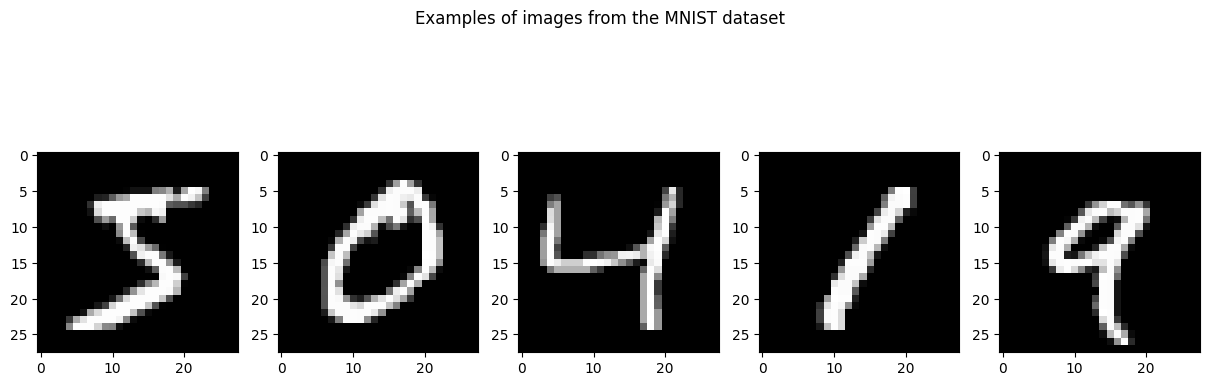

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5) :
    axs[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.suptitle("Examples of images from the MNIST dataset")
plt.show()

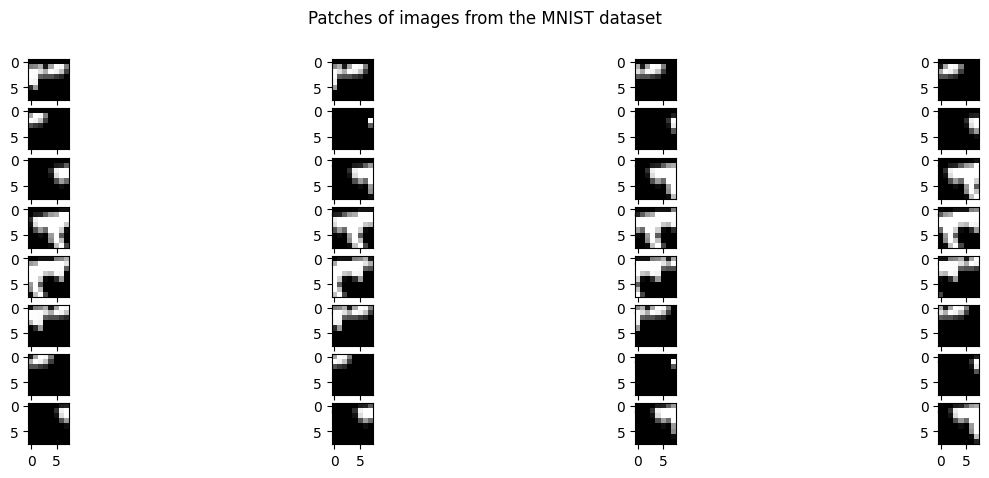

In [26]:
# Create patches from the first image (the 5 on the left of the above figure)

patch_size = 8
patches = image.extract_patches_2d(X_train[0], (patch_size, patch_size))

count=-1

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 5))
# plt.tight_layout(w_pad=0.25)
for i in range(8) :
    for j in range(4) :
        count += 1
        im = axs[i][j].imshow(patches[100 + count], cmap=plt.get_cmap('gray'))
    
plt.suptitle("Patches of images from the MNIST dataset")
plt.show()

In [6]:
# Center X
# X_centered = X - np.mean(X)

# Learn the online dictionary
k = 32
Dictionary = online_dictionary_learning(X_train, k, nb_iter=1000)

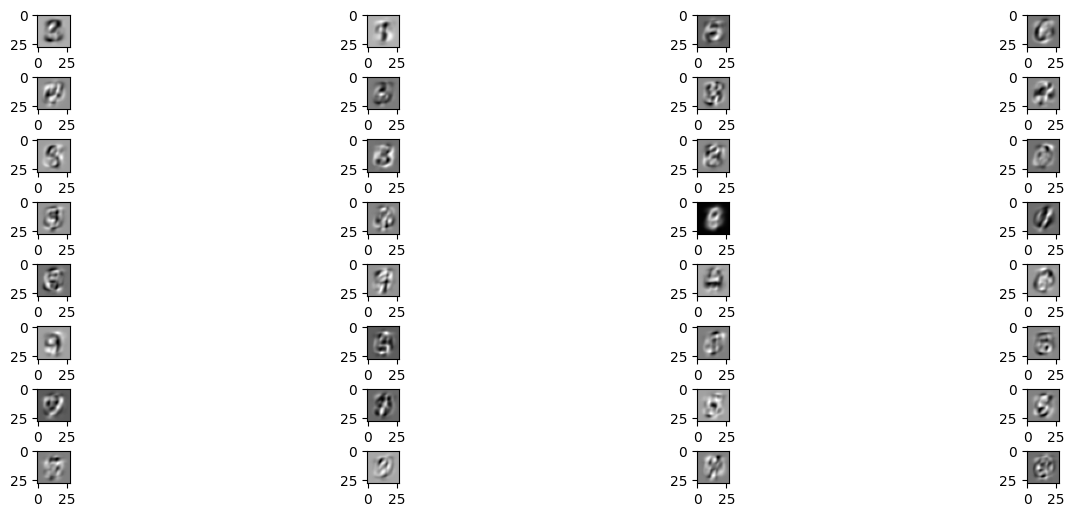

In [81]:
# Plot the dictionary
count=-1

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 5))
# plt.tight_layout(w_pad=0.25)
for i in range(8) :
    for j in range(4) :
        count += 1
        im = axs[i][j].imshow(Dictionary[:,count].reshape(28,28), cmap=plt.get_cmap('gray'))

fig.tight_layout(pad=0.1)
plt.show()

In [24]:
Dictionary_stochastic = stochastic_dictionary_learning(X_train, k, nb_iter=1000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


KeyboardInterrupt: 

## 4. Some insights into more recent uses of dictionary learning

### 4.1 From euclidean dictionaries to general dictionaries

If we forget for a moment the $\ell_1$ penalty, the remaining objective function that we want to minimize to compute the representation of a single vector $\mathbf{x}$ with respect to a dictionary $\mathbf{D}$ is

$$
\underset{\alpha_1, \dots, \alpha_k}{\min} \lVert \mathbf{x} - \sum_{i=1}^k \alpha_i \mathbf{d}_i \rVert^2
$$

Which can be interpreted as  "finding the barycenter of atoms $\mathbf{d}_1, \dots, \mathbf{d}_k$ that is closest to $\mathbf{x}$ with respect to the euclidean distance. This being said, we can replace the euclidean distance with any other distance that will better take into account the natural geometry of the problem at hand, and that geometry does not have to be the natural euclidean geometry. This is how we can generalize the idea of dictionary learning to any other type of data lying in a metric space $(\mathcal{E}, d)$. In such a setting the coefficients are computed in two steps : given some coefficients $\alpha_1, \dots, \alpha_k$, the barycenter of the atoms is defined as 

$$
\mathbf{d}^*(\alpha_1, \dots, \alpha_k) = \underset{\mathbf{d} \in \mathcal{E}}{\arg \min} \sum_{i=1}^k \alpha_i \, d(\mathbf{d}, \mathbf{d}_i)
$$

then the optimal coefficients for a point $\mathbf{x}$ are defined as 

$$
\alpha_1^*, \dots, \alpha_k^* = \underset{\alpha_1, \dots, \alpha_k}{\arg \min} d(\mathbf{x}, \mathbf{d}^*(\alpha_1, \dots, \alpha_k))
$$

### 4.2 Dictionaries in Topological Data Analysis

One of the core tools in topological data analysis (TDA) is the persistence diagram. It is an object that encapsulates a simple topological signature of complex objects, typically compact submanifolds of $\mathbb{R}^d$ Here the sparsity lies in the fact that we can represent some very complicated topological objects by a much simpler _summary_. The point here is not to delve into the details of TDA, but to show a less straightforward use of dictionary learning. One of the key ideas of TDA is to only store compact representations of data instead of the data itself. This idea is viable due to the fact that persistence diagrams enjoy a lot of stability properties that makes them "good" representations of the data in some sense. Once the space of persistence diagrams is endowed with a metric, it is then possible to define the notion of dictionaries and mixing coefficients just like in the classical euclidean setting, with the general notion of dictionary and coefficients explained above. 

<img src="persistence_diagrams.jpg" alt="drawing" width="600"/>

The space of persistence diagrams can be endowed with a family of Wasserstein-like distance functions. A diagram can be seen as a discrete measure in $\mathbb{R}^2$ so it can be equiped with the classical $p$-Wasserstein distances $W_p$. 

<img src="distance_between_diagrams.jpg" alt="drawing" width="600"/>

the two illustrations above were taken from Frederic Chazal's course (see https://geometrica.saclay.inria.fr/team/Fred.Chazal/M2Orsay2021.htm).

## 5. Conclusion

In dictionary learning, the goal is to find a _sparse_ representation of a vector $\mathbf{x}$ in a dictionary $\mathbf{D}$. That is to say, $\mathbf{x} \approx \sum_{i=1}^k \alpha_i \mathbf{d}_i$, and we aim at finding both the dictionary $\mathbf{D}$ and the coefficients $\boldsymbol{\alpha}$.
We presented two algorithms for adaptive dictionary learning : supervised dictionary learning and online dictionary learning. The first one aims at learning both a classifier and the dictionary with the associated coefficients, while the latter propose an alternative to batch methods which could be too computationally intensive in high-dimension. We fully implemented the two algorithms and showed that the second one was able to learn the sparse representation of $\mathbf{x}$. Our first algorithm works on a toy example but takes too long to converge with a real dataset.